# Analyze HPLC data and growth curves
- This script illustrates how we analyzed hplc samples to extract uptake and excretion per bacterial biomass.
- Go through different samples and identify peaks of specific substrates and the corresponding concentrations
- Plot these findings vs OD. 

To start, the script needs three different major types of data:
- The chromatograms from the HPLC runs 
- A spreadsheet with growth curves and names of the HPLC samples taken at specific times. One sample takes 5 columns (for time, od, corrected od, HPLC sample names, and notes), see example. 
- The coordination of the needed calibration curves (stored in json files e.g. calibration.json).

To work, the data have to be stored in the right subfolders. 

In [1]:
#import required packages
import glob 
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 40)
import cremerlab.hplc
#!pip install cremerlab-utils

Prepare settings table
To process samples, settings are best stored in a spreadsheet (Standard location: hplc_settings.csv). To most easiestly add new samples to the spreadsheet you can use the following which is simply generating a list of samples in a specific folder. 

In [2]:
foldername="data_hplcrawdata/example"
cremerlab.hplc.generate_setting_template(foldername,output="hplc_settings_template.csv",hplc_machine="Shimadzu_ProminenceLC2030C") 

,sample,foldername,peak_assignment,hplc_machine,peaks_manual,peaks_autofitting,background_substraction,setting_background_substraction,fitting_boundaries,time_window
10,Bado_1_FP11,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
16,Bado_2_FP08,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
17,Bado_2_FP11,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
15,Bado_3_FP08,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
18,Bado_3_FP11,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
5,Bado_4_FP08,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
26,Bado_4_FP11,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
6,Bado_5_FP08,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
24,Bado_6_FP08,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"
25,Blon_1_FP08,example,,Shimadzu_ProminenceLC2030C,[],True,True,80,"[0.1,0.3,0.0,-0.1,10,0.3,0.8,0.1]","[12,40]"


'Adjust hplc_settings_template.csv and copy rows to main settings table, e.g. hplc_settings.csv'

All cultures in growth rate file data_growthcurves/example.csv:
['B.longum08', 'B.adolescentis11', 'B.theta08', 'B.theta09', 'B.theta']


Processing files...: 100%|████████████████████████| 4/4 [00:00<00:00, 16.35it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/chromatography_data_paper/for paper/hplc_analysis_example/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...: 100%|████████████████████████| 4/4 [00:00<00:00, 21.11it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/chromatography_data_paper/for paper/hplc_analysis_example/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby([

,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,6.846092,6.833333,0.257351,-0.000571,0.062650,0.040192,1,Btet_1_FP08_chromatogram
1,9.768355,9.816667,0.049083,-0.031510,0.196188,0.024138,2,Btet_1_FP08_chromatogram
2,10.280813,10.283333,0.127178,0.100000,43.724252,13.938766,3,Btet_1_FP08_chromatogram
3,12.678008,12.616667,0.279566,0.100000,10.788051,7.559914,4,Btet_1_FP08_chromatogram
4,14.983654,14.983333,0.167091,0.100000,62.036998,25.983283,5,Btet_1_FP08_chromatogram
5,17.716667,17.916667,0.500000,-0.100000,0.612260,0.767354,6,Btet_1_FP08_chromatogram
6,19.283425,19.300000,0.306873,-0.015361,0.978043,0.752326,7,Btet_1_FP08_chromatogram
7,20.040440,20.066667,0.152913,0.019677,0.678208,0.259954,8,Btet_1_FP08_chromatogram
8,20.484166,20.533333,0.205605,-0.030159,0.780700,0.402353,9,Btet_1_FP08_chromatogram
9,20.982113,20.983333,0.194985,0.097914,1.008253,0.492787,10,Btet_1_FP08_chromatogram


Peak butyrate not found in sample Btet_1_FP08_chromatogram


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,6.772094,6.750000,0.346343,-0.043952,0.113875,0.093889,1,Btet_2_FP08_chromatogram
1,9.753064,9.800000,0.057310,-0.059062,0.240109,0.034493,2,Btet_2_FP08_chromatogram
2,10.279362,10.283333,0.127153,0.100000,43.767814,13.949952,3,Btet_2_FP08_chromatogram
3,12.674711,12.616667,0.279733,0.100000,10.809649,7.579592,4,Btet_2_FP08_chromatogram
4,14.980846,14.983333,0.167237,0.100000,58.434476,24.495733,5,Btet_2_FP08_chromatogram
5,17.733333,17.933333,0.500000,-0.100000,0.685915,0.859667,6,Btet_2_FP08_chromatogram
6,19.281137,19.300000,0.360524,-0.008519,0.977742,0.883584,7,Btet_2_FP08_chromatogram
7,20.026563,20.033333,0.147356,0.004694,1.066014,0.393750,8,Btet_2_FP08_chromatogram
8,20.451377,20.600000,0.225547,-0.078551,0.813687,0.460029,9,Btet_2_FP08_chromatogram
9,20.997703,20.983333,0.204437,0.002499,1.043438,0.534708,10,Btet_2_FP08_chromatogram


Peak ethanol not found in sample Btet_2_FP08_chromatogram
Peak butyrate not found in sample Btet_2_FP08_chromatogram


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,5.800197,5.800000,0.300269,0.000063,0.060581,0.037227,1,Btet_3_FP08_chromatogram
1,9.760561,9.816667,0.053205,-0.041120,0.201402,0.026860,2,Btet_3_FP08_chromatogram
2,10.285207,10.283333,0.126846,0.100000,43.715209,13.899522,3,Btet_3_FP08_chromatogram
3,12.678712,12.616667,0.274482,0.099999,10.877247,7.483805,4,Btet_3_FP08_chromatogram
4,14.986175,14.983333,0.166885,0.100000,55.955445,23.407266,5,Btet_3_FP08_chromatogram
5,17.733333,17.933333,0.500000,-0.100000,0.653727,0.819325,6,Btet_3_FP08_chromatogram
6,19.297623,19.300000,0.337676,-0.001106,0.962912,0.815036,7,Btet_3_FP08_chromatogram
7,20.028669,20.050000,0.153201,-0.013220,1.493719,0.573613,8,Btet_3_FP08_chromatogram
8,20.437433,20.600000,0.222412,-0.082957,0.851121,0.474503,9,Btet_3_FP08_chromatogram
9,20.998137,20.983333,0.212377,0.008133,1.064090,0.566468,10,Btet_3_FP08_chromatogram


Peak butyrate not found in sample Btet_3_FP08_chromatogram


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,6.776981,6.783333,0.251930,-0.005169,0.061051,0.038518,1,Btet_4_FP08_chromatogram
1,9.746015,9.800000,0.057930,-0.040828,0.205501,0.029840,2,Btet_4_FP08_chromatogram
2,10.279666,10.283333,0.126972,0.100000,43.206953,13.751518,3,Btet_4_FP08_chromatogram
3,12.672492,12.616667,0.277059,0.100000,10.681751,7.418306,4,Btet_4_FP08_chromatogram
4,14.980016,14.983333,0.167060,0.100000,54.083979,22.647996,5,Btet_4_FP08_chromatogram
5,17.716667,17.916667,0.500000,-0.100000,0.621067,0.778391,6,Btet_4_FP08_chromatogram
6,19.298289,19.300000,0.356576,-0.000834,0.951073,0.850072,7,Btet_4_FP08_chromatogram
7,20.019061,20.033333,0.152794,0.002189,1.678330,0.642797,8,Btet_4_FP08_chromatogram
8,20.412376,20.600000,0.224197,-0.081515,0.866597,0.487009,9,Btet_4_FP08_chromatogram
9,20.986627,20.983333,0.213786,0.025253,1.033818,0.554005,10,Btet_4_FP08_chromatogram


Peak ethanol not found in sample Btet_4_FP08_chromatogram
Peak butyrate not found in sample Btet_4_FP08_chromatogram


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/chromatography_data_paper/for paper/hplc_analysis_example/cremerlab/hplc.py:2056: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growthrates = growthrates.append(dictc, ignore_index=True)


0    [0.09, 0.129, 0.248, 0.313, 0.333, 0.423, nan,...
Name: growthcurve_OD, dtype: object

0    [0.0, 0.716666667, 1.666666667, 2.033333333, 2...
Name: growthcurve_time, dtype: object

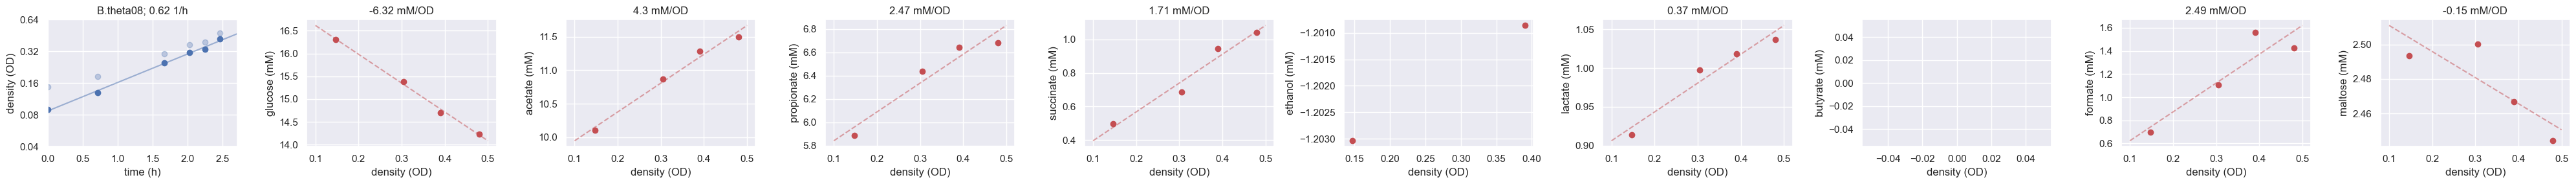

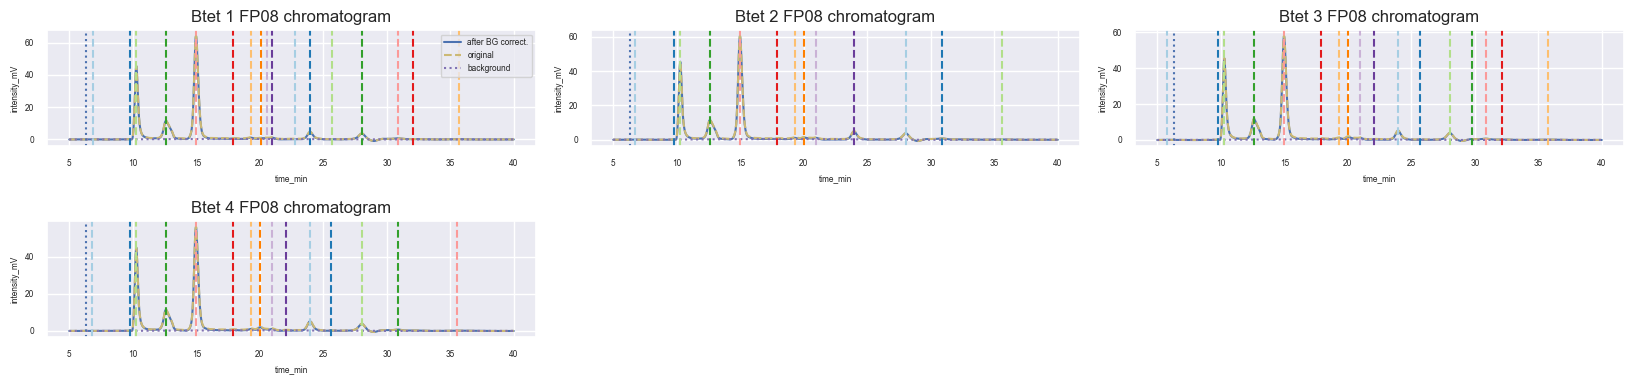

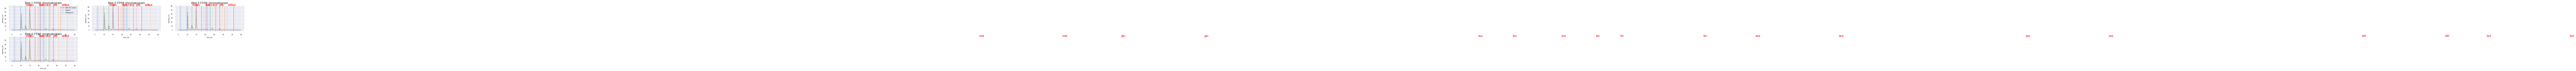

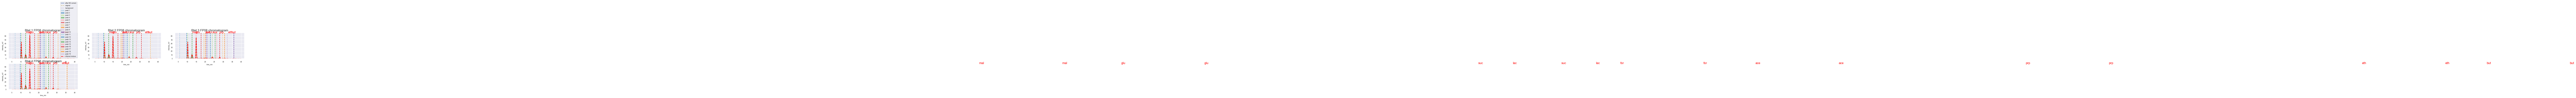

,culture,growth-rate,y0,glucose-turnover,glucose_error,glucose_val,acetate-turnover,acetate_error,acetate_val,propionate-turnover,...,butyrate_error,butyrate_val,formate-turnover,formate_error,formate_val,maltose-turnover,maltose_error,maltose_val,growthcurve_time,growthcurve_OD
0,B.theta08,0.622555,0.086903,-6.317641,0.085124,"[[0.147, 0.305, 0.39, 0.48], [16.3042736609479...",4.30213,0.154271,"[[0.147, 0.305, 0.39, 0.48], [10.1039527107666...",2.469647,...,NaN,"[[], []]",2.493292,0.57502,"[[0.147, 0.305, 0.39, 0.48], [0.69841063822938...",-0.151193,0.00504,"[[0.147, 0.305, 0.39, 0.48], [2.49336003222262...","[0.0, 0.716666667, 1.666666667, 2.033333333, 2...","[0.09, 0.129, 0.248, 0.313, 0.333, 0.423, nan,..."


In [3]:


#1. Set name of spreadsheet wit/h growth curves. Spreadsheet needs to be saved as csv file in data_growthdata
runc="example"

#2. Decide which growth curve in spreadsheed to run. 
culture_list="All" #Analyses all growth curves in 
culture_list=['B.theta08']#,'B.theta', 'B.theta09'] #or provide specifc name of culture run

#3. Make sure options for HPLC settings are set. 
# Set name of spreadsheet which contains all settings to analyze the HPLC chromatograms
filename_settings="hplc_settings.csv"
#Make sure all hplc samples part of the growth curves are needed. In the spreadsheet set also, which calibration and peak assignment file to use. 

#For analysis, you can also temporarily overwrite the settings in the settings file and provide here manual peak positions and the time interval to use for analyze. Only do this temporarily and have final settings stored in the settings table.
analysis_window=[5,40]#None #[12,20] #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.

#possible to set peak positions by hand
peakpositions=None#[18.7,19.8,20.0,20.2,20.5,20.7,21,21.5,21.75,22.1,22.5,22.7,24,27.2,28.2,35.8]

plot_upper_limit=None#5 #Provide upper limit of intensity when plotting. Autoscaling if None. 
plot_lower_limit=None #Provide lower limit of intensity when plotting. Autoscaling if None
plot_time_window=[19,24.5] #Provide time-interval to use in plots. Auto adjustment if None. 
plot_time_window=None
#plot_time_window=None #[19,24.5]
display_fullpeaklist=True #Set True if output should provide all detected peaks. 

cremerlab.hplc.process_growth_curve(runc,folder_hplcdata=None,analysis_window=analysis_window,peakpositions=peakpositions,culture_list=culture_list,filename_settings=filename_settings,folder_output="output_growthanalysis", plot_upper_limit=plot_upper_limit,plot_lower_limit=plot_lower_limit,display_fullpeaklist=display_fullpeaklist,plot_time_window=plot_time_window)